In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS/dataset7.csv')
data = data.drop(columns=['Unnamed: 0'])
data

,Unnamed: 0,본분교,국공사립,학위과정 유형,주야간,전공계열,학교유형,학교소재권역,학교소재지역,졸업년,...,"현/전_인사체계,승진제도_만족도비교",현/전_일의사회적평판_만족도비교,"현/전_일의자율성,권한_만족도비교",현/전_일자리사회적평판_만족도비교,"현/전_적성,흥미일치_만족도비교","현/전_직무관련교육,훈련",현/전_전반만족도비교,현/전_업무전반만족도비교,근무기간,"거주지,사업체_시도일치"
0,0,1,3,3,0,1,1,1,1,2019-02-01,...,0.500,0.500,0.625,0.500,0.500,0.500,0.500,0.500,0.014256,0
1,1,1,3,3,0,1,1,1,1,2019-02-01,...,0.750,0.750,0.750,0.625,0.625,0.625,0.500,0.375,0.014256,0
2,2,1,3,3,1,1,1,1,1,2019-02-01,...,0.375,0.375,0.375,0.375,0.625,0.250,0.125,0.250,0.011854,0
3,3,1,3,3,0,1,1,2,8,2019-02-01,...,0.750,0.750,0.750,0.750,0.750,0.750,0.500,0.875,0.007128,0
4,4,1,1,5,1,1,1,2,8,2019-02-01,...,0.625,0.625,0.625,0.625,0.625,0.625,0.625,0.625,0.030759,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11414,11414,1,3,3,0,7,2,2,8,2018-08-01,...,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.042613,0
11415,11415,1,3,3,0,7,2,4,14,2019-02-01,...,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.132099,0
11416,11416,1,3,3,0,7,2,4,2,2018-08-01,...,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.014256,0
11417,11417,1,3,3,0,7,2,5,13,2018-08-01,...,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.042613,0


In [ ]:
print(pd.options.display.max_columns)

# 설정 변경 (예: 1000으로 설정)
pd.options.display.max_columns = 1000

20


In [ ]:
# 2월 졸업을 0, 8월 졸업을 1로 변환
data['졸업년'] = data['졸업년'].map({'2019-02-01': 0, '2018-08-01': 1})

In [ ]:
# 종속 변수 변환 (이직준비 안함=0, 이직준비 함=1)
data['이직준비여부'] = data['이직준비여부'].replace({2: 0})

In [ ]:
# 범주형 변수를 지정
categorical_cols =  ['본분교', '국공사립', '학위과정 유형','주야간', '전공계열', '학교유형', '학교소재권역', '학교소재지역', '졸업년', 'A3.현직장_대분류', 'A5.현기업체_종사자수', 'A5현사업체_종사자수',
 'A13.현직장_법정퇴직금,퇴직연금', 'A13.현직장_유급휴가', 'A13.현직장_육아휴직', 'A13.현직장_시간외수당', 'A13.현직장_상여금', 'A13.현직장_유급주휴', 'A13.현직장_산전후휴가', 'A14.현직장_정규직여부',
 'A41.현직장_국민연금가입여부', 'A41.현직장_특수직역연금가입여부', 'A41.현직장_건강보험가입여부', 'A41.현직장_고용보험가입여부', 'A41.현직장_산재보험가입여부', 'A42.현직장_노동조합존재여부', 'A50.현직장_일자리제의경험',
 'A76.현직장_첫직장여부', 'G1.졸업후학교여부', 'L1.대학의직업교육,훈련경험', 'L12.직업교육,훈련희망여부', 'P1.혼인여부', 'P3.부양자녀유무', 'P12.부모님자산규모', 'R1.전년도소득액_근로·사업 소득여부',
 'R1.전년도소득액_육아휴직급여여부', 'R1.전년도소득액_산전후휴가급여여부', 'R1.전년도소득액_ 실업급여여부', 'R1.전년도소득액_그 외사회보험여부', 'R1.전년도소득액_공적이전소득여부', 'R1.전년도소득액_경제적지원여부',
 'R1.전년도소득액_금융,부동산소득여부', 'R1.전년도소득액_금융,부동산소득대출소득여부', 'R1.전년도소득액_기타소득여부', 'R3.가족경제적지원하는지여부', 'R4.생활비충당방식', '거주지,사업체_시도일치']

# Convert specified columns to object type
for col in categorical_cols:
    data[col] = data[col].astype('category')

##h2o

In [ ]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.3/265.3 MB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.3-py2.py3-none-any.whl size=265365897 sha256=3b36d03b2525896bf2c263ea5f0a0fdc18f917b588f6704c4f3c4fa6c703e88d
  Stored in directory: /root/.cache/pip/wheels/c4/63/41/baa115b5255e1db3e2383bce4e2e6181746aac0b42264c242f
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML
from sklearn.preprocessing import MinMaxScaler
from sklearn.inspection import permutation_importance
from collections import defaultdict
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
# H2O 초기화
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.23" 2024-04-16; OpenJDK Runtime Environment (build 11.0.23+9-post-Ubuntu-1ubuntu122.04.1); OpenJDK 64-Bit Server VM (build 11.0.23+9-post-Ubuntu-1ubuntu122.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp4uc8gx27
  JVM stdout: /tmp/tmp4uc8gx27/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp4uc8gx27/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.3
H2O_cluster_version_age:,"14 days, 14 hours and 34 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_956rpc
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
df = data.copy()
df['이직준비여부'] = df['이직준비여부'].astype('category')
h2o_df = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Train/Test split
train, test = h2o_df.split_frame(ratios=[.8], seed=42)
train['이직준비여부'] = train['이직준비여부'].asfactor()
test['이직준비여부'] = test['이직준비여부'].asfactor()


# H2O AutoML 학습
aml = H2OAutoML(max_runtime_secs=3600, seed=42, stopping_metric="AUTO", balance_classes = True)
aml.train(y='이직준비여부', training_frame=train)
#트레인세트 정확도 0.91
#검증세트에서는 정확도 0.7627

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),29/103
# GBM base models (used / total),7/26
# XGBoost base models (used / total),17/65
# DRF base models (used / total),1/2
# GLM base models (used / total),0/1
# DeepLearning base models (used / total),4/9
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [ ]:
# 리더보드 출력
lb = aml.leaderboard
print(lb)

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse       mse
StackedEnsemble_AllModels_4_AutoML_1_20240626_73116     0.810108   0.478198  0.90253                 0.363467  0.39723   0.157792
StackedEnsemble_AllModels_3_AutoML_1_20240626_73116     0.809868   0.478413  0.902416                0.355943  0.397323  0.157866
StackedEnsemble_BestOfFamily_4_AutoML_1_20240626_73116  0.809799   0.47822   0.902755                0.333345  0.397306  0.157852
StackedEnsemble_AllModels_2_AutoML_1_20240626_73116     0.80823    0.47999   0.902368                0.345785  0.39821   0.158571
StackedEnsemble_BestOfFamily_3_AutoML_1_20240626_73116  0.807483   0.480734  0.90129                 0.353744  0.398407  0.158728
StackedEnsemble_AllModels_1_AutoML_1_20240626_73116     0.807188   0.481012  0.902172                0.356226  0.398811  0.15905
XGBoost_grid_1_AutoML_1_20240626_73116_model_23         0.806208   0.481804  0.901279      

In [ ]:
# 최상의 모델 확인
best_model = aml.leader
print("Best Model:", best_model)

Best Model: Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_4_AutoML_1_20240626_73116


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       29/103
# GBM base models (used / total)           7/26
# XGBoost base models (used / total)       17/65
# DRF base models (used / total)           1/2
# GLM base models (used / total)           0/1
# DeepLearning base models (used / total)  4/9
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.07208587807327337
RMSE: 0.26848813395245863
LogLoss: 0.2673133260537981
AU

In [ ]:
# 테스트 데이터에서 예측 수행 및 평가
preds = best_model.predict(test)
perf = best_model.model_performance(test)

# 예측 결과와 모델 성능 출력
print("Predictions:")
print(preds)
print("Model Performance:")
print(perf)
#테스트세트 정확도 0.7642

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Predictions:
  predict         p0        p1
        0  0.625976   0.374024
        1  0.251932   0.748068
        0  0.557066   0.442934
        1  0.131493   0.868507
        0  0.839726   0.160274
        1  0.298401   0.701599
        0  0.571715   0.428285
        1  0.497938   0.502062
        1  0.0688818  0.931118
        1  0.0799126  0.920087
[2248 rows x 3 columns]

Model Performance:
ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.15838401509993447
RMSE: 0.39797489254968643
LogLoss: 0.4807324924856048
AUC: 0.8036153206257434
AUCPR: 0.9017651853136335
Gini: 0.6072306412514867
Null degrees of freedom: 2247
Residual degrees of freedom: 2218
Null deviance: 2749.336081975117
Residual deviance: 2161.373286215279
AIC: 2221.373286215279

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.41408865115663707
       0    1     Error    Rate
-----  ---  ----  -

In [ ]:
# 개별 모델 리스트 확인
base_models = best_model.params['base_models']['actual']
base_model_ids = [model['name'] for model in base_models]
print("Base Models:", base_model_ids)

Base Models: ['XGBoost_grid_1_AutoML_1_20240626_73116_model_23', 'XGBoost_grid_1_AutoML_1_20240626_73116_model_34', 'XGBoost_grid_1_AutoML_1_20240626_73116_model_50', 'XGBoost_grid_1_AutoML_1_20240626_73116_model_7', 'XGBoost_grid_1_AutoML_1_20240626_73116_model_8', 'GBM_grid_1_AutoML_1_20240626_73116_model_20', 'GBM_grid_1_AutoML_1_20240626_73116_model_16', 'GBM_grid_1_AutoML_1_20240626_73116_model_15', 'XGBoost_grid_1_AutoML_1_20240626_73116_model_16', 'GBM_grid_1_AutoML_1_20240626_73116_model_14', 'GBM_grid_1_AutoML_1_20240626_73116_model_7', 'GBM_grid_1_AutoML_1_20240626_73116_model_19', 'XGBoost_grid_1_AutoML_1_20240626_73116_model_15', 'XGBoost_grid_1_AutoML_1_20240626_73116_model_29', 'XGBoost_grid_1_AutoML_1_20240626_73116_model_37', 'GBM_5_AutoML_1_20240626_73116', 'XGBoost_grid_1_AutoML_1_20240626_73116_model_40', 'GBM_grid_1_AutoML_1_20240626_73116_model_6', 'XGBoost_grid_1_AutoML_1_20240626_73116_model_62', 'XGBoost_grid_1_AutoML_1_20240626_73116_model_51', 'XGBoost_grid_1_

In [ ]:
# 모든 모델의 특성 중요도 추출
feature_importances = defaultdict(list)

In [ ]:
# 기본 모델의 특성 중요도 추출 및 정규화
for model_id in base_model_ids:
    model = h2o.get_model(model_id)

    if 'varimp' in dir(model):
        importance = model.varimp(use_pandas=True)
        importance['relative_importance'] = MinMaxScaler().fit_transform(importance[['relative_importance']])
        for idx, row in importance.iterrows():
            feature_importances[row['variable']].append(row['relative_importance'])

In [ ]:
# 순열 중요도 계산 및 정규화 (varimp가 없는 모델에 대해)
for model_id in base_model_ids:
    model = h2o.get_model(model_id)

    if 'varimp' not in dir(model):
        # 테스트 데이터를 pandas DataFrame으로 변환
        X_test = test.drop(['이직준비여부']).as_data_frame()
        y_test = test['이직준비여부'].as_data_frame().values.flatten()

        # 예측 함수 정의
        def model_predict(X):
            h2o_X = h2o.H2OFrame(X)
            return model.predict(h2o_X).as_data_frame()['predict'].values

        # 순열 중요도 계산
        result = permutation_importance(model_predict, X_test, y_test, n_repeats=10, random_state=42)

        # 순열 중요도 정규화
        scaled_importance = MinMaxScaler().fit_transform(result.importances_mean.reshape(-1, 1)).flatten()

        for feature, importance in zip(X_test.columns, scaled_importance):
            feature_importances[feature].append(importance)

In [ ]:
# 평균 특성 중요도 계산
mean_importances = {feature: np.mean(importances) for feature, importances in feature_importances.items()}

# 평균 중요도가 가장 높은 30개의 특성 출력
top_30_features = sorted(mean_importances.items(), key=lambda item: item[1], reverse=True)[:30]
top_30_df = pd.DataFrame(top_30_features, columns=['Feature', 'Mean Importance'])
print(top_30_df)

                 Feature  Mean Importance
0         A33-1.현직장전반만족도         0.961377
1          A14.현직장_정규직여부         0.441860
2     A34.현직장_교육,일수준일치정도         0.399602
3        A50.현직장_일자리제의경험         0.247314
4            Q9.한달간감정_부정         0.196813
5     A33.현직장만족도_개인발전가능성         0.183805
6   A33.현직장만족도_인사체계,승진제도         0.181090
7       A35.현직장_기술수준일치정도         0.177440
8     R1.전년도소득액_근로·사업소득액         0.172828
9     R2-2.전년도월평균사교육비지출액         0.157582
10                  근무기간         0.156137
11       A7-1.현직장_출근hour         0.152024
12         A33-2.업무전반만족도         0.149472
13            A3.현직장_대분류         0.147816
14   R1.전년도소득액_ 산전후휴가급여액         0.147725
15      A33.현직장만족도_고용안정성         0.146200
16   R1.전년도소득액_산전후휴가급여여부         0.145424
17           Q9.한달간감정_긍정         0.145158
18            Q2.주평균운동시간         0.137833
19    R1.전년도소득액_육아휴직급여여부         0.135871
20     A32-1.현직장_초임월평균소득         0.133658
21       A32.현직장_월평균근로소득         0.132345
22     R1.전년도소득액_육아휴직급여액         0

## ROC curve 시각화

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [ ]:
# 훈련 세트 예측
train_preds = best_model.predict(train).as_data_frame()
train_actual = train['이직준비여부'].as_data_frame().values.flatten()

# 검증 세트 예측
test_preds = best_model.predict(test).as_data_frame()
test_actual = test['이직준비여부'].as_data_frame().values.flatten()


stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [ ]:
# ROC 곡선 및 AUC 계산 (훈련 세트)
fpr_train, tpr_train, _ = roc_curve(train_actual, train_preds['p1'])
roc_auc_train = auc(fpr_train, tpr_train)

# ROC 곡선 및 AUC 계산 (검증 세트)
fpr_test, tpr_test, _ = roc_curve(test_actual, test_preds['p1'])
roc_auc_test = auc(fpr_test, tpr_test)

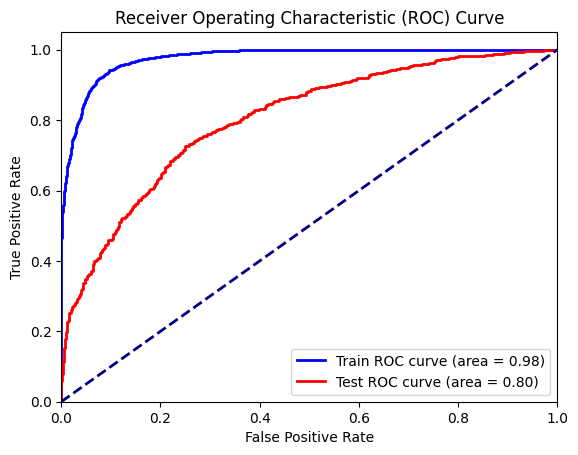

In [ ]:
# ROC 곡선 그리기
plt.figure()
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='Train ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='red', lw=2, label='Test ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

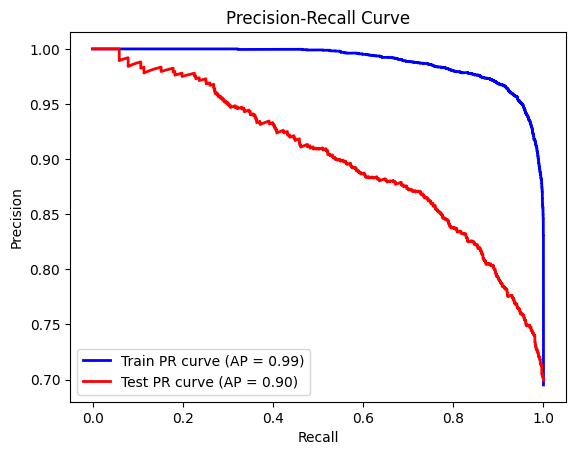

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Precision-Recall 곡선 및 AP 계산 (훈련 세트)
precision_train, recall_train, _ = precision_recall_curve(train_actual, train_preds['p1'])
average_precision_train = average_precision_score(train_actual, train_preds['p1'])

# Precision-Recall 곡선 및 AP 계산 (검증 세트)
precision_test, recall_test, _ = precision_recall_curve(test_actual, test_preds['p1'])
average_precision_test = average_precision_score(test_actual, test_preds['p1'])

# Precision-Recall 곡선 그리기
plt.figure()
plt.plot(recall_train, precision_train, color='blue', lw=2, label='Train PR curve (AP = %0.2f)' % average_precision_train)
plt.plot(recall_test, precision_test, color='red', lw=2, label='Test PR curve (AP = %0.2f)' % average_precision_test)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()